# Week 1
## Fundamentals of risk and returns
### Fundamentals of Returns

In [84]:
import pandas as pd
pd.set_option("display.max_columns", 999)
import numpy as np
from functools import reduce

#You can also use plotly backend on Pandas to get some prettier charts. The standard option is 'matplotlib'.
#pd.options.plotting.backend = "plotly"

In [2]:
prices = []
stocks = ["BOVA11", "ABEV3", "AZUL4", "BBAS3", "CVCB3", "JBSS3", "OIBR3", "SMAL11", "SMLS3",] #"VIVA3"]
for f in stocks:
    data = pd.read_csv("./br_stocks/{}.csv".format(f)).dropna()[["date", "close"]]
    prices.append(data)
prices = reduce(lambda x, y: pd.merge(x, y, on='date'), prices)

prices['date'] = pd.to_datetime(prices["date"])
prices = prices.set_index("date").round(2)
prices.columns = stocks
prices

,BOVA11,ABEV3,AZUL4,BBAS3,CVCB3,JBSS3,OIBR3,SMAL11,SMLS3
date,,,,,,,,,
2017-04-11,62.42,17.62,22.40,32.82,28.60,10.45,2.69,62.68,64.74
2017-04-12,61.68,17.67,22.96,32.28,28.72,10.15,2.69,62.10,63.85
2017-04-13,60.80,17.76,22.99,30.60,29.26,10.20,3.13,62.18,62.58
2017-04-17,62.25,18.06,22.85,32.02,30.45,10.34,3.10,63.20,65.74
2017-04-18,61.95,18.16,23.91,32.33,30.55,10.20,3.28,63.40,65.98
...,...,...,...,...,...,...,...,...,...
2020-06-01,85.47,12.60,15.35,31.80,15.50,21.96,0.80,97.27,13.38
2020-06-02,87.55,12.97,16.75,32.82,18.60,21.81,0.83,101.13,15.01
2020-06-03,89.65,13.25,18.45,34.75,19.82,20.60,0.82,105.77,16.93


In [3]:
prices.index = pd.Index(prices.index + pd.offsets.MonthEnd(0))
prices = prices.loc[~prices.index.duplicated(keep='last')][9:]
prices.head()

,BOVA11,ABEV3,AZUL4,BBAS3,CVCB3,JBSS3,OIBR3,SMAL11,SMLS3
date,,,,,,,,,
2018-01-31,82.00,21.95,31.05,39.68,55.13,10.05,2.69,84.20,82.15
2018-02-28,82.50,22.00,33.63,41.80,56.14,9.91,3.02,83.65,84.28
2018-03-31,82.43,24.07,38.20,41.03,60.65,9.35,2.94,83.75,69.50
2018-04-30,83.18,23.33,36.40,36.70,57.99,8.75,2.89,85.57,72.00
2018-05-31,74.07,19.69,26.51,30.37,51.00,8.93,2.63,76.00,58.27


In [4]:
returns = prices.pct_change().dropna()
returns.head()

,BOVA11,ABEV3,AZUL4,BBAS3,CVCB3,JBSS3,OIBR3,SMAL11,SMLS3
date,,,,,,,,,
2018-02-28,0.006098,0.002278,0.083092,0.053427,0.018320,-0.013930,0.122677,-0.006532,0.025928
2018-03-31,-0.000848,0.094091,0.135891,-0.018421,0.080335,-0.056509,-0.026490,0.001195,-0.175368
2018-04-30,0.009099,-0.030744,-0.047120,-0.105533,-0.043858,-0.064171,-0.017007,0.021731,0.035971
2018-05-31,-0.109522,-0.156022,-0.271703,-0.172480,-0.120538,0.020571,-0.089965,-0.111838,-0.190694
2018-06-30,-0.050223,-0.086846,-0.195398,-0.056635,-0.113725,0.041433,-0.007605,-0.036842,-0.107603


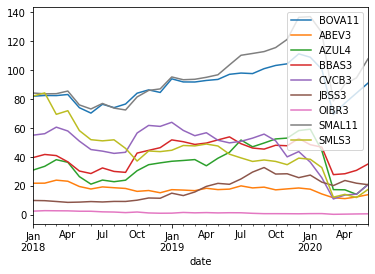

In [5]:
prices.plot()

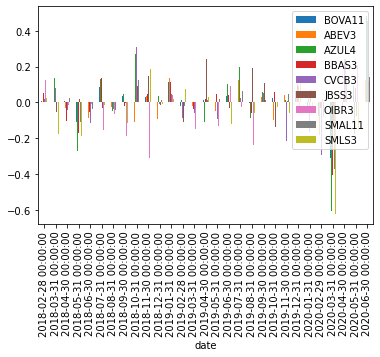

In [6]:
returns.plot.bar()

In [7]:
returns.std(ddof=1)

BOVA11    0.081173
ABEV3     0.090688
AZUL4     0.194228
BBAS3     0.136568
CVCB3     0.182322
JBSS3     0.121162
OIBR3     0.183235
SMAL11    0.096504
SMLS3     0.174807
dtype: float64

In [8]:
returns.mean()

BOVA11    0.007227
ABEV3    -0.011191
AZUL4     0.009246
BBAS3     0.005212
CVCB3    -0.014058
JBSS3     0.032394
OIBR3    -0.021281
SMAL11    0.013859
SMLS3    -0.032844
dtype: float64

In [9]:
((returns+1).prod()-1)

BOVA11    0.110366
ABEV3    -0.359909
AZUL4    -0.318519
BBAS3    -0.112903
CVCB3    -0.620715
JBSS3     1.084577
OIBR3    -0.687732
SMAL11    0.280166
SMLS3    -0.785271
dtype: float64

### Measures of Risk and Reward

In [10]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.mean()
volatility = np.sqrt(variance)
volatility

BOVA11    0.079761
ABEV3     0.089111
AZUL4     0.190850
BBAS3     0.134193
CVCB3     0.179151
JBSS3     0.119055
OIBR3     0.180048
SMAL11    0.094826
SMLS3     0.171767
dtype: float64

In [11]:
variance = squared_deviations.sum() / (returns.shape[0] - 1)
volatility = variance**0.5
volatility

BOVA11    0.081173
ABEV3     0.090688
AZUL4     0.194228
BBAS3     0.136568
CVCB3     0.182322
JBSS3     0.121162
OIBR3     0.183235
SMAL11    0.096504
SMLS3     0.174807
dtype: float64

In [12]:
returns.std()*np.sqrt(12)

BOVA11    0.281191
ABEV3     0.314153
AZUL4     0.672827
BBAS3     0.473086
CVCB3     0.631582
JBSS3     0.419719
OIBR3     0.634745
SMAL11    0.334301
SMLS3     0.605549
dtype: float64

In [13]:
data = pd.read_csv("./data/Portfolios_Formed_on_ME_monthly_EW.csv", index_col=0,
    parse_dates=True, na_values=-99.99)

In [14]:
data

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


In [15]:
columns = ["Lo 10", "Hi 10"]
portf = data[columns]
portf.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [16]:
portf = portf/100

In [17]:
portf.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [18]:
portf.columns = ["SmallCap", "LargeCap"]
portf.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


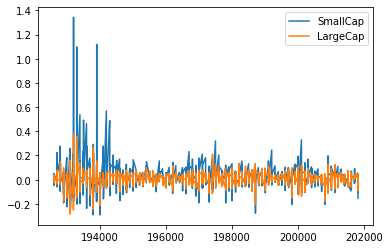

In [19]:
portf.plot.line()

In [20]:
portf.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [21]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

BOVA11    0.281191
ABEV3     0.314153
AZUL4     0.672827
BBAS3     0.473086
CVCB3     0.631582
JBSS3     0.419719
OIBR3     0.634745
SMAL11    0.334301
SMLS3     0.605549
dtype: float64

In [22]:
n_months=len(returns)
returns_per_month = (returns+1).prod()**(1/n_months) -1
returns_per_month

BOVA11    0.003617
ABEV3    -0.015267
AZUL4    -0.013137
BBAS3    -0.004123
CVCB3    -0.032877
JBSS3     0.025653
OIBR3    -0.039340
SMAL11    0.008553
SMLS3    -0.051665
dtype: float64

In [23]:
annualized_return = (returns_per_month + 1)**12 - 1
annualized_return

BOVA11    0.044272
ABEV3    -0.168573
AZUL4    -0.146734
BBAS3    -0.048364
CVCB3    -0.330456
JBSS3     0.355213
OIBR3    -0.382213
SMAL11    0.107608
SMLS3    -0.470896
dtype: float64

In [24]:
return_risk_ratio = annualized_return/annualized_vol

In [25]:
riskfree_rate = 0.03

In [26]:
excess_return = (annualized_return - riskfree_rate)
sharpe_ratio = excess_return / annualized_vol
sharpe_ratio

BOVA11    0.050755
ABEV3    -0.632090
AZUL4    -0.262674
BBAS3    -0.165645
CVCB3    -0.570719
JBSS3     0.774834
OIBR3    -0.649415
SMAL11    0.232150
SMLS3    -0.827176
dtype: float64

### Measuring Max Drawdown

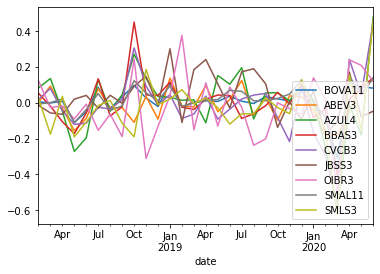

In [27]:
returns.plot.line()

In [28]:
#returns.index = returns.index.to_period('M')
returns.head()

,BOVA11,ABEV3,AZUL4,BBAS3,CVCB3,JBSS3,OIBR3,SMAL11,SMLS3
date,,,,,,,,,
2018-02-28,0.006098,0.002278,0.083092,0.053427,0.018320,-0.013930,0.122677,-0.006532,0.025928
2018-03-31,-0.000848,0.094091,0.135891,-0.018421,0.080335,-0.056509,-0.026490,0.001195,-0.175368
2018-04-30,0.009099,-0.030744,-0.047120,-0.105533,-0.043858,-0.064171,-0.017007,0.021731,0.035971
2018-05-31,-0.109522,-0.156022,-0.271703,-0.172480,-0.120538,0.020571,-0.089965,-0.111838,-0.190694
2018-06-30,-0.050223,-0.086846,-0.195398,-0.056635,-0.113725,0.041433,-0.007605,-0.036842,-0.107603


<b> Compute drawdowns </b>:
- compute a wealth index;
- compute previous peaks;
- compute drawndown - wich is the wealth value as a percentage of the previous peak

In [29]:
wealth_index = 1000*(1+returns).cumprod()

In [30]:
wealth_index.head()

,BOVA11,ABEV3,AZUL4,BBAS3,CVCB3,JBSS3,OIBR3,SMAL11,SMLS3
date,,,,,,,,,
2018-02-28,1006.097561,1002.277904,1083.091787,1053.427419,1018.320334,986.069652,1122.676580,993.467933,1025.928180
2018-03-31,1005.243902,1096.583144,1230.273752,1034.022177,1100.126973,930.348259,1092.936803,994.655582,846.013390
2018-04-30,1014.390244,1062.870159,1172.302738,924.899194,1051.877381,870.646766,1074.349442,1016.270784,876.445526
2018-05-31,903.292683,897.038724,853.784219,765.372984,925.086160,888.557214,977.695167,902.612827,709.312234
2018-06-30,857.926829,819.134396,686.956522,722.026210,819.880283,925.373134,970.260223,869.358670,632.988436


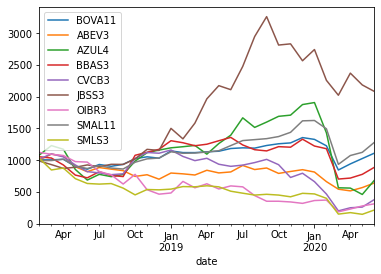

In [31]:
wealth_index.plot.line()

In [32]:
previous_peaks = wealth_index.cummax()

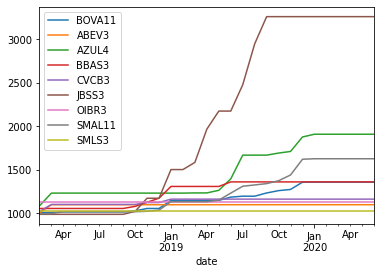

In [33]:
previous_peaks.plot.line()

In [34]:
drawdown = (wealth_index - previous_peaks) / previous_peaks

In [35]:
drawdown.head()

,BOVA11,ABEV3,AZUL4,BBAS3,CVCB3,JBSS3,OIBR3,SMAL11,SMLS3
date,,,,,,,,,
2018-02-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-03-31,-0.000848,0.000000,0.000000,-0.018421,0.000000,-0.056509,-0.026490,0.000000,-0.175368
2018-04-30,0.000000,-0.030744,-0.047120,-0.122010,-0.043858,-0.117053,-0.043046,0.000000,-0.145705
2018-05-31,-0.109522,-0.181969,-0.306021,-0.273445,-0.159110,-0.098890,-0.129139,-0.111838,-0.308614
2018-06-30,-0.154244,-0.253012,-0.441623,-0.314593,-0.254740,-0.061554,-0.135762,-0.144560,-0.383009


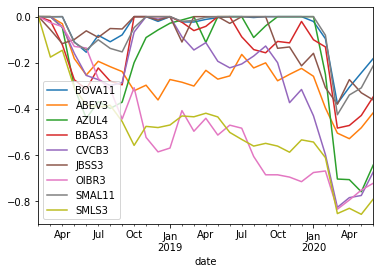

In [36]:
drawdown.plot.line()

In [37]:
drawdown.mean()

BOVA11   -0.063583
ABEV3    -0.263298
AZUL4    -0.193998
BBAS3    -0.146334
CVCB3    -0.263126
JBSS3    -0.102603
OIBR3    -0.482530
SMAL11   -0.072435
SMLS3    -0.491637
dtype: float64

In [38]:
drawdown.idxmin()

BOVA11   2020-03-31
ABEV3    2020-04-30
AZUL4    2020-05-31
BBAS3    2020-03-31
CVCB3    2020-03-31
JBSS3    2020-03-31
OIBR3    2020-03-31
SMAL11   2020-03-31
SMLS3    2020-05-31
dtype: datetime64[ns]

## Beyond the Gaussian case: Extreme risk estimates

### Deviations from normality

### Downside risk measures

In [39]:
def get_hfi_returns():
    hfi = pd.read_csv("./data/edhec-hedgefundindices.csv", header=0, index_col=0, parse_dates=True)
    hfi = hfi/100
    hfi.index = hfi.index.to_period("M")
    return hfi

def skewness(r):
    demeaned_r = r - r.mean()
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r ** 3).mean()
    return exp/sigma_r**3

def kurtosis(r):
    demeaned_r = r - r.mean()
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r ** 4).mean()
    return exp/sigma_r**4

def get_ffme_return():
    me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", header=0, index_col=0, na_values=-99.99)
    rets = me_m[["Lo 10", "Hi 10"]]
    rets.columns = ["SmallCap", "LargeCap"]
    rets = rets/100
    rets.index = pd.to_datetime(rets.index, format="%Y%m").to_period("M")
    return rets

In [40]:
hfi = get_hfi_returns()

In [41]:
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [42]:
pd.concat([hfi.mean(), hfi.median(), hfi.mean() > hfi.median()], axis='columns')

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


In [43]:
skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [44]:
from scipy import stats

In [45]:
stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

In [46]:
normal_rets = np.random.normal(0, .15, size=(26300, 1))

In [47]:
stats.skew(normal_rets)

array([0.01874656])

In [48]:
kurtosis(hfi).sort_values()

CTA Global                 2.952960
Long/Short Equity          4.523893
Global Macro               5.741679
Short Selling              6.117772
Funds Of Funds             7.070153
Distressed Securities      7.889983
Event Driven               8.035828
Merger Arbitrage           8.738950
Emerging Markets           9.250788
Relative Value            12.121208
Equity Market Neutral     17.218555
Convertible Arbitrage     23.280834
Fixed Income Arbitrage    29.842199
dtype: float64

In [49]:
stats.kurtosis(hfi)

array([20.28083446, -0.04703963,  4.88998336,  6.25078841, 14.21855526,
        5.03582817, 26.84219928,  2.74167945,  1.52389258,  5.73894979,
        9.12120787,  3.11777175,  4.07015278])

In [50]:
stats.jarque_bera(normal_rets)

Jarque_beraResult(statistic=2.6945740994194765, pvalue=0.25994452146660485)

In [51]:
s, p = stats.jarque_bera(hfi)
p > .01

False

In [52]:
s, p = stats.jarque_bera(normal_rets)
p > .01

True

In [53]:
def is_normal(df, conf = .01):
    s, p = stats.jarque_bera(df)
    return p > conf

In [54]:
hfi.aggregate(is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [55]:
rets = get_ffme_return()

In [56]:
rets.aggregate(stats.skew)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [57]:
rets.aggregate(stats.kurtosis)

SmallCap    43.845008
LargeCap     7.694654
dtype: float64

In [58]:
rets.aggregate(is_normal)

SmallCap    False
LargeCap    False
dtype: bool

### Estimating VaR

- Consider a portfolio with a +.5% monthly expected return and 4% monthly volatility. What is the 95% monthly Gaussian VaR for the portfolio?  
VaR = -(.5%-1.65x4%) = 6.1%
  
  
- Consider an asset with a skewness equal to -1.2 and kurtosis equal to 6. Keeping in mind that Z5%, the critical value for probability 95% is -1.65, indicate what would be the modified critical value for probability 95% using the Cornish Fisher expansion.
![image.png](img/1.png)

### Lab Session-Semi Deviation, VAR and CVAR

In [59]:
hfi = get_hfi_returns()

##### Semideviation

In [60]:
def semideviation(r):
    is_negative = r < 0
    return r[is_negative].std(ddof=0)

In [61]:
hfi.std(ddof=0) # This is the standard std

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [62]:
hfi[hfi<0].std(ddof=0) # std for values which are lower than zero

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [63]:
semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

##### VaR and CVaR
Value at Risk

- Historic VaR;
- Parametric VaR (Gaussian Parametric);
- Modified Cornish-Fisher VaR (returns are not Gaussian, assuming fat tails);

##### Historic VaR
We look at the past returns and assume the future will be the same.

In [64]:
from scipy.stats import norm

In [65]:
np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [66]:
def var_historic(r, level=5):
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be Series or DataFrame")
        
def var_gaussian(r, level=5, modified=False):
    z = norm.ppf(level/100)
    if modified:
        s = skewness(r)
        k = kurtosis(r)
        z = (z + 
                (z**2 -1) *s /6 +
                (z**3 -3*z)*(k-3)/24 - 
                (2*z**3 - 5*z) * (s**2)/36
            )
    
    return -(r.mean() + z*r.std(ddof=0))

In [67]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [68]:
z = norm.ppf(.05)
z

-1.6448536269514729

In [69]:
- (hfi.mean() + z * hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [70]:
var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [71]:
var_gaussian(hfi, True)

Convertible Arbitrage     0.032960
CTA Global                0.050107
Distressed Securities     0.032623
Emerging Markets          0.069296
Equity Market Neutral     0.014380
Event Driven              0.032533
Fixed Income Arbitrage    0.022428
Global Macro              0.028780
Long/Short Equity         0.039956
Merger Arbitrage          0.016978
Relative Value            0.020873
Short Selling             0.112563
Funds Of Funds            0.031880
dtype: float64

In [72]:
comparison = pd.concat(
    [var_gaussian(hfi), var_gaussian(hfi, modified=True), var_historic(hfi)], axis=1
)
comparison.columns = ["gaussian", "cornish-fisher", "historic"]
comparison

,gaussian,cornish-fisher,historic
Convertible Arbitrage,0.021691,0.025166,0.01576
CTA Global,0.034235,0.033094,0.03169
Distressed Securities,0.021032,0.025102,0.01966
Emerging Markets,0.047164,0.053011,0.04247
Equity Market Neutral,0.008850,0.010734,0.00814
Event Driven,0.021144,0.025516,0.02535
Fixed Income Arbitrage,0.014579,0.017881,0.00787
Global Macro,0.018766,0.013581,0.01499
Long/Short Equity,0.026397,0.027935,0.02598
Merger Arbitrage,0.010435,0.012612,0.01047


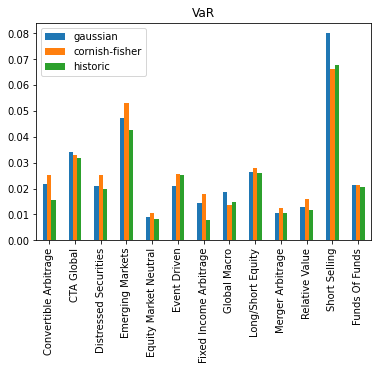

In [73]:
comparison.plot.bar(title="VaR")

##### BeyondVar aka CVaR

In [74]:
def cvar_historic(r, level=5):
    """
    Computes the Conditional VaR of Series or DataFrame
    """
    if isinstance(r, pd.Series):
        is_beyond = r <= var_historic(r, level=level)
        return -r[is_beyond].mean()
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic, level=level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")

In [75]:
cvar_historic(hfi)

Convertible Arbitrage    -0.001672
CTA Global                0.001510
Distressed Securities    -0.001871
Emerging Markets         -0.001028
Equity Market Neutral    -0.001603
Event Driven             -0.003557
Fixed Income Arbitrage   -0.000380
Global Macro              0.000065
Long/Short Equity        -0.002061
Merger Arbitrage         -0.001469
Relative Value           -0.001211
Short Selling             0.009873
Funds Of Funds           -0.001228
dtype: float64

# Week 2
An Introduction to Portfolio Optimization
## Introduction to Optimization and The Efficient Frontier
### The only free lunch in finance

- If A and B are perfectly correlated, then the volatility of a portfolio that is 50% in A and 50% in B is the average of the volatilities of A and B:  
The returns of perfectly correlated portfolios are in sync with each other and the portfolio volatility is the average of the volatilities of A and B
  
  
- The volatility of a portfolio of two assets that have non-zero weights and a correlation coefficient of 0.9 is always strictly lower than the weighted average volatility of the two assets:  
As long as the two weights are non-zero and the correlation between the two assets are less than 1, the volatility of the portfolio will always be less than the weighted average volatilities of the two assets.
  
  
- An analyst tells you that the minimum volatility portfolio you can construct from two risky assets X and Y is to put 100% of your capital in X. What is the analyst telling you?  
Either X and Y are perfectly correlated  
If X and Y are perfectly correlated, the minimum value portfolio is obtained by putting 100% of your capital in the portfolio with the lower of the two volatility.  

- The lowest possible volatility you can construct from a portfolio of two assets A and B:  
INCREASES as the correlation between A and B increases  
CORRECT as correlations increase, the volatility of the minimum possible volatility portfolio increases


### Lab Session: Efficient Frontier - Part1

In [121]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)


def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

In [85]:
ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100

In [87]:
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period("M")

In [88]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,0.0207,0.0407,0.0543,0.0318,0.1639,0.0102,0.0564,0.0154,-0.0140,0.0704,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,0.0472,0.0217,0.0206,0.0210,0.0423,0.0166,0.0055,0.0085,0.0369,-0.0169,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,-0.0050,0.0015,0.0036,-0.0056,0.0483,0.0273,0.0174,0.0030,-0.0369,0.0204,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,-0.0455,-0.0385,0.0111,-0.0573,-0.0793,-0.0556,-0.0320,0.0223,-0.0104,-0.0263,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,0.0220,0.0386,0.0318,0.0508,-0.0066,0.0787,0.0846,-0.0048,0.0006,0.0371,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [91]:
ind.columns = ind.columns.str.strip("")

In [103]:
def get_ind_returns():
    ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period("M")
    ind.columns = ind.columns.str.strip()
    return ind

def drawdown(return_series: pd.Series):
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

In [99]:
ind = get_ind_returns()

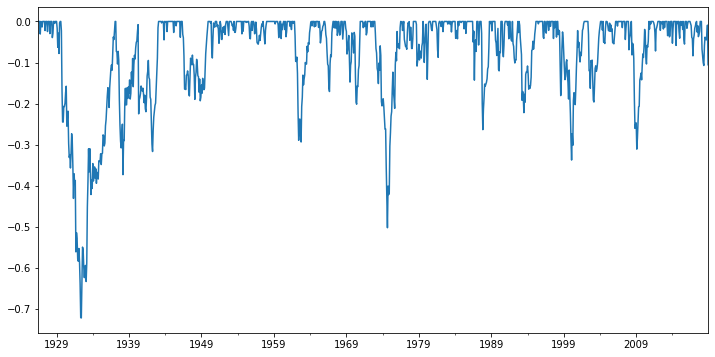

In [111]:
drawdown(ind["Food"])["Drawdown"].plot.line(figsize=(12,6))

In [112]:
var_gaussian(ind[["Food", "Smoke", "Coal", "Beer", "Fin"]], modified=True)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

In [113]:
var_gaussian(ind, modified=True).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [114]:
var_gaussian(ind, modified=True).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

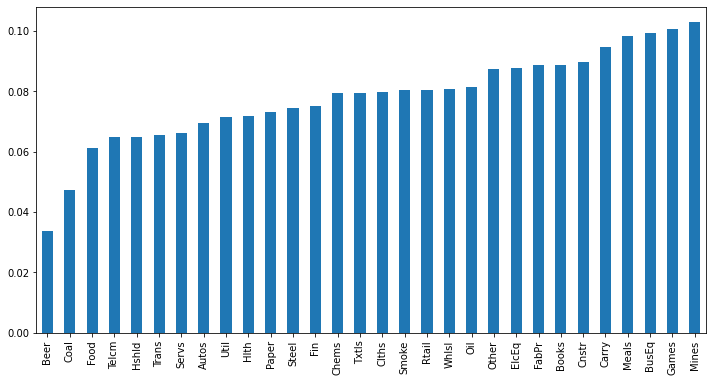

In [116]:
var_gaussian(ind, modified=True).sort_values().plot.bar(figsize=(12,6))

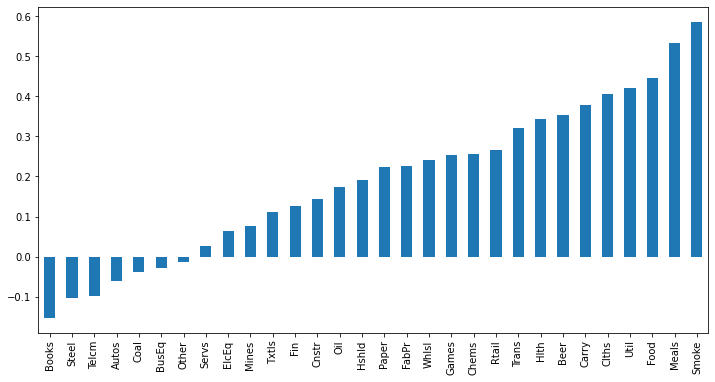

In [127]:
sharpe_ratio(ind["2000":"2018"], 0.03, 12).sort_values().plot.bar(figsize=(12,6))

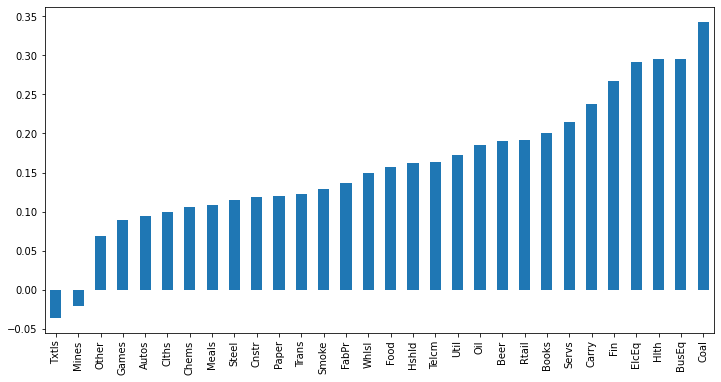

In [133]:
er = annualize_rets(ind["1995":"2000"], 12)
er.sort_values().plot.bar(figsize=(12,6))

In [136]:
cov = ind["1995":"2000"].cov()
cov.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,0.001282,0.000027,0.000613,0.001146,0.000547,0.001419,0.000829,0.000034,0.000933,0.000858,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,0.001945,0.000131,0.000666,0.001107,0.001296,0.001804,0.000272,0.001261,0.000672,0.000631,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,0.001181,0.000167,0.000668,-0.000013,0.000223,0.001485,0.001311,-0.000544,0.000849,0.001118,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,0.001723,0.002670,0.002498,0.001980,0.001994,0.001644,0.001600,0.001557,0.000968,0.000023,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,0.001531,0.001797,0.001704,0.002084,0.001550,0.001301,0.001281,0.002051,0.000868,0.000455,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
